Author: Abdullah Yasser Borai Ahmed Ismail
Model Used: CNN
The purpose of this system is to predict the letter drawn based on previous data
Used File: https://data-flair.s3.ap-south-1.amazonaws.com/Data-Science-Code/handwritten-character-recognition-code.zip

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# importing the libraries used to split and shuffle data
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# importing the keras api from TensorFlow framework
from tensorflow import keras

# importing the libraries used to handle and train data
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.optimizers import Adam, SGD
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

2024-07-10 08:44:57.892900: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-10 08:44:57.893080: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-10 08:44:58.068525: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Loading the data file (CSV)**

In [2]:
# creating a path for the data we have
file_path = "/kaggle/input/handwritten-data/A_Z Handwritten Data.csv"
# loading the data into "data"
data = pd.read_csv(file_path).astype('float32')

**Splitting the data**

In [3]:
# sppliting the data into x values and y values
# y is the column with the name '0'
y = data['0']
# and X is everything except that
X = data.drop('0', axis = 1)

**Splitting the data into training and testing data**

In [4]:
# splitting the data into training and testing data
np.random.seed(44)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

# reshaping the data so that they can be displayed as images instead of numerical values
train_x = np.reshape(train_x.values, (train_x.shape[0], 28, 28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28, 28))

# printing the shape of the data
print(train_x.shape)
print(test_x.shape)

# the data was converted from numerical to 28 * 28 pixel images

(297960, 28, 28)
(74490, 28, 28)


**Creating a dictionary for the letters**

In [5]:
# mapping the integer values with characters because as shown in the csv file all 'o' column is of type float
# the alphabets (sorted)
alphabets = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
# a dictionary to hold the characters as values based on the value in 'o' 0 --> 25
alphabets_dictionary = {}

# filling in the dictionary
for i in range(26):
    alphabets_dictionary[i] = alphabets[i]

# printing the dictionary
print(alphabets_dictionary)

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}


**Visualizing the stats from data**

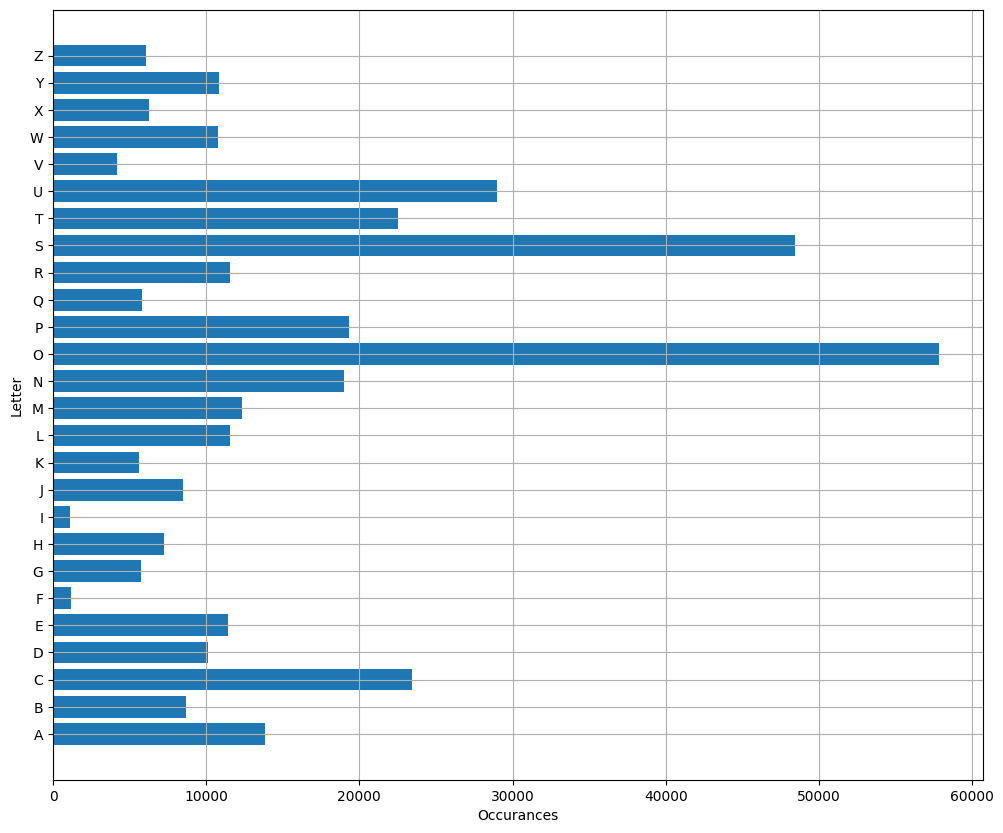

In [6]:
# converting the y values 'o' from float into int
y_values = np.intp(y)

# calculating the occurences of each letter based on its 'o' value
occurences = np.zeros(26, dtype='int')
for i in y_values:
    occurences[i] += 1

# an array to hold the int values of each letter
letters_int_values = [i for i in alphabets_dictionary.values()]

# plotting the results
ig, ax = plt.subplots(1,1, figsize=(12,10))
ax.barh(letters_int_values, occurences)
plt.xlabel("Occurances")
plt.ylabel("Letter")
plt.grid()
plt.show()

**Shuffling the data**

In [7]:
# shuffling a part of the data we have
np.random.seed(44)                 # putting a seed to get the same result each time
shuff = shuffle(train_x[:100])

**Reshaping the data to fit into the model**

In [8]:
# creating training data and testing data by reshaping the old data
train_X = train_x.reshape(train_x.shape[0], train_x.shape[1], train_x.shape[2], 1)
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)

# the reason for that reshaping is that the old shape can't be put into the model
# so a reshape was required
model_train_y = to_categorical(train_y, num_classes = 26)
model_test_y = to_categorical(test_y, num_classes = 26)

**Designing the model**

In [9]:
# creating the CNN model that will be used to train the data
model = Sequential()

# setting the convolution layers which are the at the beginning
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
# setting the maxpool layers which are the next
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

# repeating the process again
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

# repeating the process again
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

# flattenning the layers of previous layers before activating it to Dense Layer
model.add(Flatten())

# activating the Dense Layer
model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(26, activation="softmax"))


**Fitting the data**

In [10]:
# compiling the CNN model
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Adam optimizating method was used with a learning rate = 0.001

# fitting the data by the model
fitting = model.fit(train_X, model_train_y, epochs = 1, validation_data = (test_X, model_test_y))

9312/9312 ━━━━━━━━━━━━━━━━━━━━ 213s 23ms/step - accuracy: 0.9094 - loss: 0.3527 - val_accuracy: 0.9752 - val_loss: 0.0870


**Predicting some values to check the functionality of the model**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


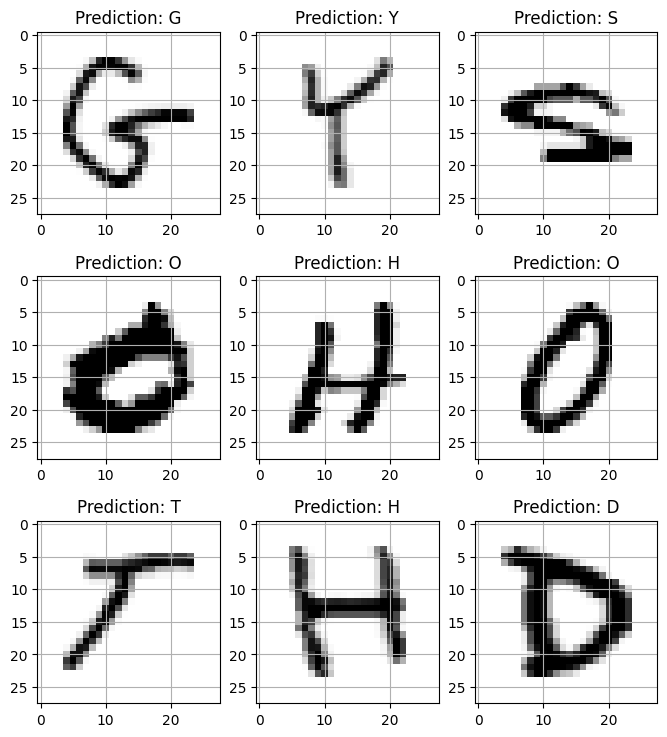

In [11]:
# using the model to predict some of the test data 
predictions = model.predict(test_X[0:9])

# using np.argmax to get the index of the letter with highest possibility
predicted_labels = np.argmax(predictions, axis = 1)

fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
for i,ax in enumerate(axes):
    # reshaping the x values of the test data so that they can be plotted as images
    img = np.reshape(test_X[i], (28,28))
    # plotting the image
    ax.imshow(img, cmap="Greys")
    
    # using the indices we have as keys, we can find the predicted letter
    predicted_letter = alphabets_dictionary[predicted_labels[i]]
    ax.set_title("Prediction: " + predicted_letter)
    ax.grid()

**Evaluating the model**

In [12]:
# importing a library to assess the model performance
from sklearn.metrics import classification_report

# Evaluating the performance of the model
# creating a function to return an array with the number of the letter
# e.g. c --> 2, z --> 25
def expected_letters(y_test):
    # an array to hold the numbers of each letter
    y_true = []
    # looping through each subarray in y_test array
    for x in y_test:
        # the index of the element with the value 1 is target number
        letter_index = np.where(x == 1)[0][0]
        # adding this number to the array
        y_true.append(letter_index)
    # return the array of numbers
    return y_true

# a list to hold the true values
y_true = expected_letters(model_test_y)
# a list to hold the expected values
y_predicted = np.argmax(model.predict(test_X), axis = 1)

# printing a classification report
print(classification_report(y_true, y_predicted))

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2745
           1       1.00      0.84      0.91      1719
           2       0.98      0.98      0.98      4606
           3       0.96      0.92      0.94      2056
           4       0.94      0.99      0.97      2244
           5       0.97      0.98      0.97       250
           6       0.87      0.97      0.91      1164
           7       0.96      0.96      0.96      1489
           8       0.97      0.93      0.95       256
           9       0.98      0.93      0.96      1704
          10       0.92      0.97      0.95      1140
          11       0.97      0.98      0.98      2304
          12       0.99      0.96      0.98      2470
          13       0.97      0.99      0.98      3835
          14       0.98      0.99      0.98     11572
          15       0.99      0.98      0.99      3812
          16       0.99      0.90    